In [32]:
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [33]:
file_path = "../Resources/wineQualityWhites.csv"
whiteWine_df = pd.read_csv(file_path)
whiteWine_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
# Columns
whiteWine_df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [35]:
# List DataFrame data types
whiteWine_df.dtypes

Unnamed: 0                int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
# Find null values
for column in whiteWine_df.columns:
    print(f"Column {column} has {whiteWine_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column fixed.acidity has 0 null values
Column volatile.acidity has 0 null values
Column citric.acid has 0 null values
Column residual.sugar has 0 null values
Column chlorides has 0 null values
Column free.sulfur.dioxide has 0 null values
Column total.sulfur.dioxide has 0 null values
Column density has 0 null values
Column pH has 0 null values
Column sulphates has 0 null values
Column alcohol has 0 null values
Column quality has 0 null values


In [37]:
# Find Duplicate entries
print(f"Duplicate entries: {whiteWine_df.duplicated().sum()}")

Duplicate entries: 0


In [38]:
# Drop 'Unnamed' column
whiteWine_df.drop(columns='Unnamed: 0', inplace=True)
whiteWine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
# Use summary statistics
whiteWine_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [40]:
# Split our data into our featured matrix (X) and our target (y)
X = whiteWine_df.drop(columns=['quality'])
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [41]:
# Create target (y)
y = whiteWine_df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [42]:
# View y and put in order to graph
sorted_y = y.value_counts().sort_index()
sorted_y

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Quality Distribution'}, xlabel='Qaulity Categories', ylabel='Number of Wines'>

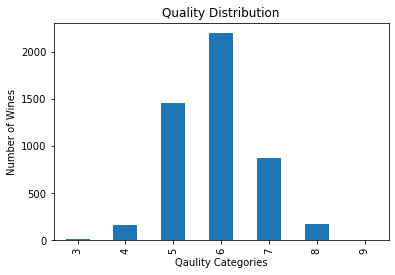

In [53]:
y_plot = sorted_y.plot(kind='bar', title='Quality Distribution', 
              xlabel='Qaulity Categories', ylabel='Number of Wines')
y_plot

In [54]:
# Save plot as png
y_plot.figure.savefig('../Images/quality_distribution.png')

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [13]:
# Use StandardScaler to scale the dataset and balance the values
# Create an instance of the StandardScaler model
# model
Scaler = StandardScaler()

# fit
Scaler = Scaler.fit(X_train)

#transform
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

## Random Forest Classifier

In [14]:
# Create an instance of a RFC
# Model
rf_clf = RandomForestClassifier(n_estimators=300, random_state=5)

# Fit
rf_clf = rf_clf.fit(X_train_scaled, y_train) 

In [15]:
# Evaluate training performance of RFC
rf_clf.score(X_train_scaled, y_train)

1.0

In [16]:
# Evaluate testing performance of RFC
rf_clf.score(X_test_scaled, y_test)

0.686530612244898

In [17]:
# Find the importance of each feature
importances = rf_clf.feature_importances_
importances

array([0.07586649, 0.10004806, 0.08215613, 0.08835731, 0.08509397,
       0.09327684, 0.09142691, 0.10514742, 0.08578527, 0.07818754,
       0.11465406])

In [18]:
# We can sort the features by their importance.
sorted_features = sorted(zip(importances, X.columns), reverse=True)
sorted_features

[(0.1146540647120727, 'alcohol'),
 (0.1051474164010821, 'density'),
 (0.10004805817732768, 'volatile.acidity'),
 (0.09327684480681951, 'free.sulfur.dioxide'),
 (0.09142690951596416, 'total.sulfur.dioxide'),
 (0.08835731030161029, 'residual.sugar'),
 (0.08578526593558168, 'pH'),
 (0.08509396538879824, 'chlorides'),
 (0.08215612823086826, 'citric.acid'),
 (0.07818754249490957, 'sulphates'),
 (0.07586649403496569, 'fixed.acidity')]

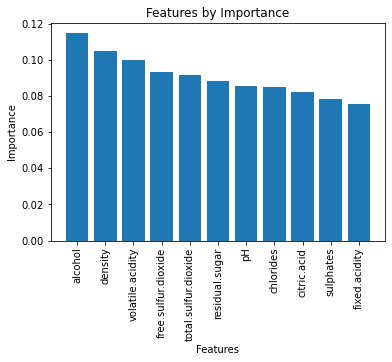

In [71]:
# Graph the features by importance
a, b = zip(*sorted_features)
plt.bar(b, a)
plt.xticks(rotation = 90)
plt.title("Features by Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Clustering
# Clustering is a type of unsupervised learning that groups data points together
Exploratory data analysis

In [20]:
#The K-means algorithm groups the data into K clusters, where belonging to a cluster is based on some similarity or distance measure to a centroid.
# Initializing model with K = 5 (since we already know there are 11 elements)
model = KMeans(n_clusters=3, random_state=5)
model


KMeans(n_clusters=3, random_state=5)

In [21]:
# Fitting model
model.fit(whiteWine_df)

KMeans(n_clusters=3, random_state=5)

In [22]:
# Get the predictions
predictions = model.predict(whiteWine_df)
print(predictions)

[2 1 0 ... 0 0 0]


In [23]:
# Add a new class column to the whiteWine_df
whiteWine_df["class"] = model.labels_
whiteWine_df.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [24]:
# Plotting the clusters with two features
# *dont know which elements to use yet*
whiteWine_df.hvplot.scatter(x="sulphates" , y="pH" , by="quality")

:NdOverlay   [quality]
   :Scatter   [sulphates]   (pH)

In [25]:
# Pandas to_csv() method to export the DataFrame to a CSV 
output_file_path = "<path to folder>/nameOfFile.csv"
name_of_df.to_csv(output_file_path, index=False)

NameError: name 'name_of_df' is not defined